In [1]:
%matplotlib inline

from sklearn.utils import shuffle
from sklearn.model_selection import  train_test_split
from sklearn.metrics import f1_score
from sklearn.datasets import fetch_mldata

import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = fetch_mldata('MNIST original')

In [61]:
print(len(mnist.data))
print(mnist.data.shape)
print(mnist.target.shape)
print(mnist.target[0])
print(np.max(mnist.target))

70000
(70000, 784)
(70000,)
0.0
9.0


In [17]:
mnist_X, mnist_y = shuffle(mnist.data, mnist.target, random_state=42)
mnist_X = mnist_X / 255.0
train_X, test_X, train_y, test_y = train_test_split(
    mnist_X, mnist_y, test_size=0.2, random_state=42)
train_X, valid_X, train_y, valid_y = train_test_split(
    train_X, train_y , test_size=0.2, random_state=42)

In [27]:
print(mnist_X.shape)
print(np.max(mnist_X))
print(mnist_X[0].shape)

(70000, 784)
1.0
(784,)


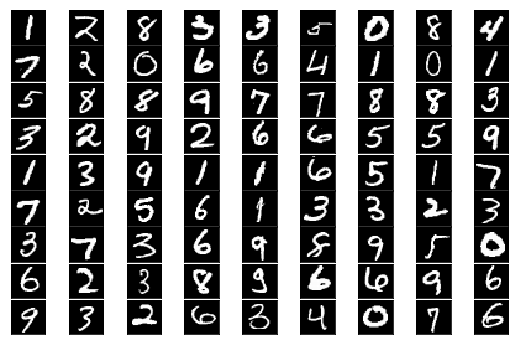

In [19]:
fig = plt.figure(figsize=(9,9))
fig.subplots_adjust(left=0.2, right=1, bottom=0, top=0.5,
                   hspace=0.05, wspace=0.05)

for i in range(81):
    ax = fig.add_subplot(9, 9, i + 1, xticks=[], yticks=[])
    ax.imshow(train_X[i].reshape((28, 28)), cmap='gray')

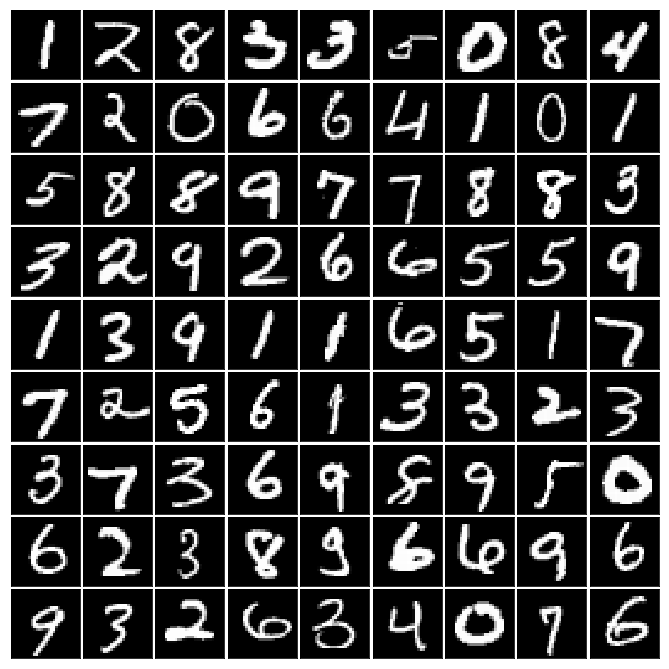

In [29]:
fig = plt.figure(figsize=(9,9))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1,
                   hspace=0.05, wspace=0.05)

for i in range(81):
    ax = fig.add_subplot(9, 9, i + 1, xticks=[], yticks=[])
    ax.imshow(train_X[i].reshape((28, 28)), cmap='gray')

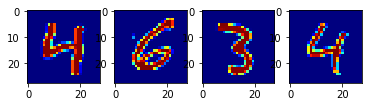

In [31]:
import sklearn
from sklearn.utils import shuffle
from matplotlib import pyplot as plt

imgs = list(map(lambda x: x.reshape(28, 28), shuffle(mnist.data)))

row, col = 1, 4

fig = plt.figure()
for i in range(row * col):
    sp = fig.add_subplot(row, col, i + 1)
    sp.imshow(imgs[i], cmap='jet', interpolation='none' )
plt.show()

In [35]:
def cos_d(a, b):
    return np.dot(a, b) / np.linalg.norm(a) / np.linalg.norm(b)

print(cos_d(np.array([1,2,3]), np.array([1,2,3])))
print(cos_d(np.array([1,2,3]), np.array([1,2,5])))
print(cos_d(np.array([1,2,3]), np.array([1,1,6])))
print(cos_d(np.array([1,2,3]), np.array([-1,-2,-3])))

1.0
0.975900072949
0.910465468
-1.0


In [3]:
from sklearn.utils import shuffle
from sklearn.metrics import f1_score
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split

import numpy as np

def load_mnist():
    mnist = fetch_mldata('MNIST original')
    mnist_X, mnist_y = shuffle(mnist.data.astype('float32'),
                               mnist.target.astype('int32'), random_state=42)

    mnist_X = mnist_X / 255.0

    return train_test_split(mnist_X, mnist_y,
                test_size=0.2,
                random_state=42)

def validate_homework():
    train_X, test_X, train_y, test_y = load_mnist()

    # validate for small dataset
    train_X_mini = train_X[:1000]
    train_y_mini = train_y[:1000]
    test_X_mini = test_X[:1000]
    test_y_mini = test_y[:1000]

    pred_y = homework(train_X_mini, train_y_mini, test_X_mini)
    print(f1_score(test_y_mini, pred_y, average='macro'))

def score_homework():
    train_X, test_X, train_y, test_y = load_mnist()
    pred_y = homework(train_X, train_y, test_X)
    print(f1_score(test_y, pred_y, average='macro'))


In [13]:
def homework(train_X, train_y, test_X):
    # WRITE ME
    def _homework(one_X):
        k = 10
        def cos_d(a, b):
            return np.dot(a, b) / np.linalg.norm(a) /np.linalg.norm(b)
        def v_cos_d(vs, b):
            return np.apply_along_axis(lambda v: cos_d(v, b), 1, vs)
        distances = v_cos_d(train_X, one_X)
        order = np.argsort(distances)[::-1]
        k_closest_labels = (train_y[order])[:k]        
        labels_counts = np.bincount(np.concatenate(
            (np.arange(10), k_closest_labels))) - 1
        #plt.imshow(one_X.reshape(28,28), cmap='gray')
        #plt.show()
        #print(np.argmax(labels_counts))
        return(np.argmax(labels_counts))
    
    return np.apply_along_axis(_homework, 1, test_X)

In [14]:
validate_homework()

0.865915263722


In [39]:
def cos_d(a, b):
    return np.dot(a, b) / np.linalg.norm(a) /np.linalg.norm(b)

In [40]:
cos_d(np.array([[1,2], [3,4]]), np.array([[1,2], [3,4]]))

array([[ 0.23333333,  0.33333333],
       [ 0.5       ,  0.73333333]])

In [47]:
def cos_d(a, b):
    return np.einsum('ij,ij->i', a, b) / np.linalg.norm(a, axis=1) /np.linalg.norm(b, axis=1)



In [46]:
print(np.linalg.norm(np.array([[1,2,3], [2,3,4]]), axis=1))
print(np.sqrt(1 + 4 + 9))

[ 3.74165739  5.38516481]
3.74165738677


In [50]:
a = np.arange(6).reshape((3, 2))
b = np.arange(3,9).reshape((3,2))
print(a)
print(b)

[[0 1]
 [2 3]
 [4 5]]
[[3 4]
 [5 6]
 [7 8]]


In [51]:
cos_d(a, b)

array([ 0.8       ,  0.99430915,  0.99902823])

In [53]:
def org_cos_d(a, b):
    return np.dot(a, b) / np.linalg.norm(a) /np.linalg.norm(b)

print(org_cos_d([0, 1], [3, 4]))
print(org_cos_d([2, 3], [5, 6]))
print(org_cos_d([4,5], [7,8]))

0.8
0.99430915392
0.999028234938


In [54]:
print(np.einsum('ij,ij->i', a,b))

[ 4 28 68]


In [58]:
print(np.argsort(np.array([3,2,5,1,4])))

[3 1 0 4 2]


In [59]:
np.array([3,2,5,1,4])[np.argsort([3,2,5,1,4])]

array([1, 2, 3, 4, 5])

In [65]:
a = np.array([1,2,3,1,2,1,1,1,3,2,2,1,5,3,5,3,2,7,7,7,9,29,2,7,3,6])
counts = np.bincount(a)
print(counts)
print(np.argmax(counts))

[0 6 6 5 0 2 1 4 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
1


In [92]:
def cos_d(a, b):
    return np.dot(a, b) / np.linalg.norm(a) /np.linalg.norm(b)

def v_cos_d(vs, b):
    return np.apply_along_axis(lambda x: cos_d(x, b), 1, vs)

In [97]:
vs = np.arange(50).reshape((5, 10))
b = np.arange(10)
res = v_cos_d(vs, b)
print(res.shape)
print(res)

print('Correct values')
for i in range(5):
    print(cos_d(vs[i], b))

(5,)
[ 1.          0.93140634  0.89984069  0.88465983  0.87583205]
Correct values
1.0
0.931406337032
0.899840692845
0.88465983045
0.875832046014


In [103]:
a = np.concatenate((np.arange(10), np.array([3,2,5,5,1,1,7,2,2,7,8])))
counts = np.bincount(a)
print(counts - 1)

[0 2 3 1 0 2 0 2 1 0]


In [ ]:
score_homework()

In [7]:
def homework(train_X, train_y, test_X):
    # WRITE ME
    from sklearn.neighbors import KNeighborsClassifier
    neigh = KNeighborsClassifier(n_neighbors=10)
    neigh.fit(train_X, train_y)
    return neigh.predict(test_X)

In [8]:
validate_homework()

0.856110581521


In [25]:
def homework(train_X, train_y, test_X):
    # WRITE ME
    import operator
    def _homework(one_X):
        k = 10
        def cos_d(a, b):
            return np.dot(a, b) / np.linalg.norm(a) /np.linalg.norm(b)
        def v_cos_d(vs, b):
            return np.apply_along_axis(lambda v: cos_d(v, b), 1, vs)
        distances = v_cos_d(train_X, one_X)
        order = np.argsort(distances)[::-1]
        k_closest_labels = (train_y[order])[:k]
        counter = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}
        for l in k_closest_labels:
            counter[l] += 1
        # print(max(counter.items(), key=operator.itemgetter(1))[0])
            
        return(max(counter.items(), key=operator.itemgetter(1))[0])
    
    return np.apply_along_axis(_homework, 1, test_X)

In [24]:
validate_homework()

0.865915263722


In [27]:
print('Ver2')
%timeit validate_homework()

Ver2
0.865915263722
0.865915263722
0.865915263722
0.865915263722
1 loop, best of 3: 24.5 s per loop


In [30]:
def homework(train_X, train_y, test_X):
    # WRITE ME
    def _homework(one_X):
        k = 10
        def cos_d(a, b):
            return np.dot(a, b) / np.linalg.norm(a) /np.linalg.norm(b)
        def v_cos_d(vs, b):
            return np.apply_along_axis(lambda v: cos_d(v, b), 1, vs)
        distances = v_cos_d(train_X, one_X)
        order = np.argsort(distances)[::-1]
        k_closest_labels = (train_y[order])[:k]        
        labels_counts = np.bincount(np.concatenate(
            (np.arange(10), k_closest_labels))) - 1
        return(np.argmax(labels_counts))
    
    return np.apply_along_axis(_homework, 1, test_X)

In [29]:
print('Ver1')
%timeit validate_homework()

Ver1
0.865915263722
0.865915263722
0.865915263722
0.865915263722
1 loop, best of 3: 24.3 s per loop


In [31]:
validate_homework()

0.865915263722
